In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
parent_path = str(Path().joinpath('..').resolve())
sys.path.append(parent_path)

In [3]:
from triple_agent.parsing.replay.get_parsed_replays import get_parsed_replays
from triple_agent.classes.action_tests import ActionTest
from triple_agent.classes.outcomes import WinType
from triple_agent.classes.missions import Missions
from triple_agent.reports.specific.mission_choices import mission_choices
#from triple_agent.reports.specific.mission_completes import mission_completion, mission_completion_query
from triple_agent.reports.specific.action_tests import action_test_percentages, diff_action_test_percentages
from triple_agent.reports.specific.fingerprints import attempted_fingerprint_sources
from triple_agent.reports.specific.banana_breads import all_banana_bread_percentages, first_banana_bread_percentages, banana_split
from triple_agent.reports.specific.character_selection import (spy_selection,
                                                      st_selection,
                                                      amba_selection,
                                                      double_agent_selection,
                                                      determine_character_in_role)
from triple_agent.reports.specific.bug import bug_attempt_timings, bug_success_rate
from triple_agent.reports.specific.time_adds import time_add_times, time_add_times_per_game
from triple_agent.reports.specific.game_outcomes import game_outcomes
from triple_agent.reports.specific.seduce import first_flirt_timing
from triple_agent.constants.events import SCL5_PICK_MODES, SCL5_VENUE_MODES, SCL5_DROPPED_PLAYERS
from triple_agent.reports.specific.stop_talks import stop_talk_in_game_percentage
from triple_agent.reports.specific.mission_progress import mission_progress
from triple_agent.reports.specific.microfilm import at_or_direct_mf, microfilm_direction
from triple_agent.classes.roles import Roles
from triple_agent.reports.generation.common_sort_functions import sort_by_spy_wins
from triple_agent.reports.generation.plot_specs import AxisProperties, DataQueryProperties

In [4]:
division = 'Copper'

In [5]:
div_replays = get_parsed_replays(
    lambda g: g.division == division \
    and g.event == 'SCL5' \
    and g.spy not in SCL5_DROPPED_PLAYERS \
    and g.sniper not in SCL5_DROPPED_PLAYERS)

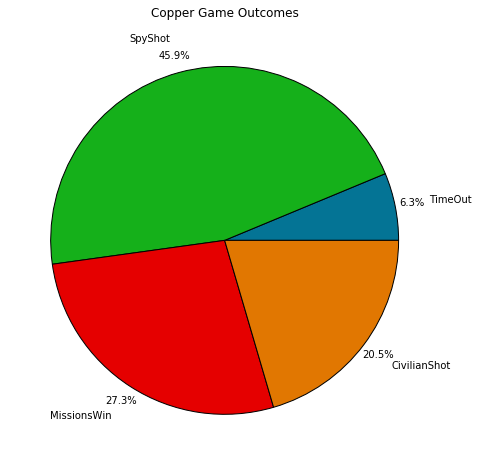

DataPlotProperties(frame=     WinType.TimeOut  WinType.SpyShot  WinType.MissionsWin  \
NaN               30              220                  131   

     WinType.CivilianShot  
NaN                    98  , stacks_are_categories=True)

In [6]:
game_outcomes(div_replays, axis_properties=AxisProperties(title=f"{division} Game Outcomes"))

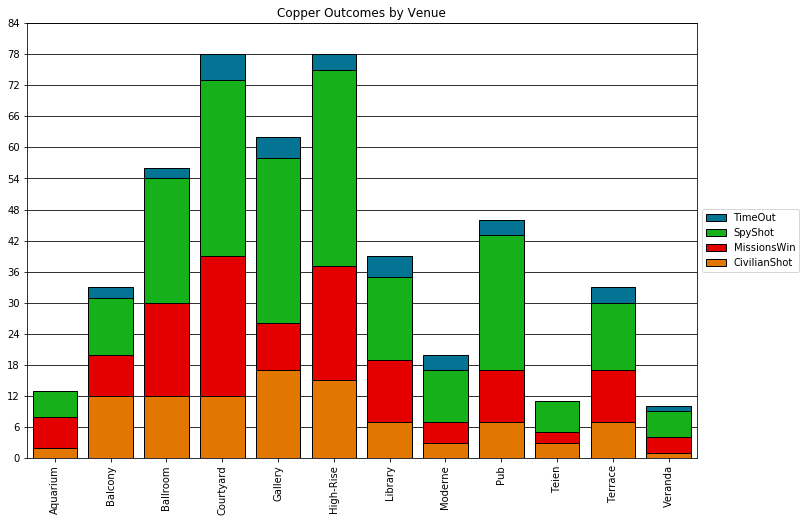

DataPlotProperties(frame=                      Aquarium  Balcony  Ballroom  Courtyard  Gallery  \
WinType.TimeOut              0        2         2          5        4   
WinType.SpyShot              5       11        24         34       32   
WinType.MissionsWin          6        8        18         27        9   
WinType.CivilianShot         2       12        12         12       17   

                      High-Rise  Library  Moderne  Pub  Teien  Terrace  \
WinType.TimeOut               3        4        3    3      0        3   
WinType.SpyShot              38       16       10   26      6       13   
WinType.MissionsWin          22       12        4   10      2       10   
WinType.CivilianShot         15        7        3    7      3        7   

                      Veranda  
WinType.TimeOut             1  
WinType.SpyShot             5  
WinType.MissionsWin         3  
WinType.CivilianShot        1  , stacks_are_categories=False)

In [7]:
game_outcomes(
    div_replays,
    DataQueryProperties(groupby=lambda g: g.venue),
    AxisProperties(title=f"{division} Outcomes by Venue")
)

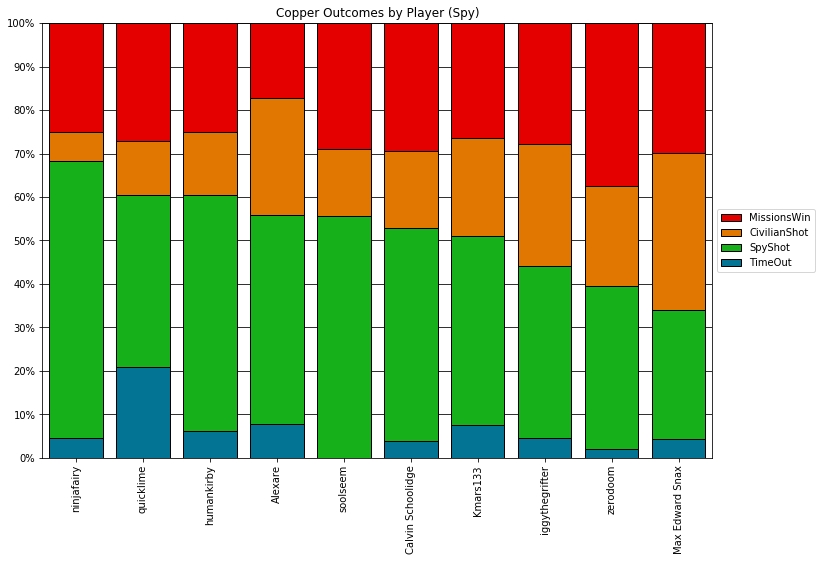

DataPlotProperties(frame=                      ninjafairy  quicklime  humankirby   Alexare  soolseem  \
WinType.MissionsWin     0.250000   0.270833    0.250000  0.173077  0.288889   
WinType.CivilianShot    0.068182   0.125000    0.145833  0.269231  0.155556   
WinType.SpyShot         0.636364   0.395833    0.541667  0.480769  0.555556   
WinType.TimeOut         0.045455   0.208333    0.062500  0.076923  0.000000   

                      Calvin Schoolidge  Kmars133  iggythegrifter  zerodoom  \
WinType.MissionsWin            0.294118  0.264151        0.279070  0.375000   
WinType.CivilianShot           0.176471  0.226415        0.279070  0.229167   
WinType.SpyShot                0.490196  0.433962        0.395349  0.375000   
WinType.TimeOut                0.039216  0.075472        0.046512  0.020833   

                      Max Edward Snax  
WinType.MissionsWin          0.297872  
WinType.CivilianShot         0.361702  
WinType.SpyShot              0.297872  
WinType.TimeOut        

In [8]:
game_outcomes(
    div_replays,
    DataQueryProperties(
        groupby=lambda g: g.spy,
        percent_normalized_data=True,
        primary_order=[WinType.MissionsWin, WinType.CivilianShot, WinType.SpyShot, WinType.TimeOut],
        secondary_order=sort_by_spy_wins
    ),
    AxisProperties(title=f"{division} Outcomes by Player (Spy)")
)

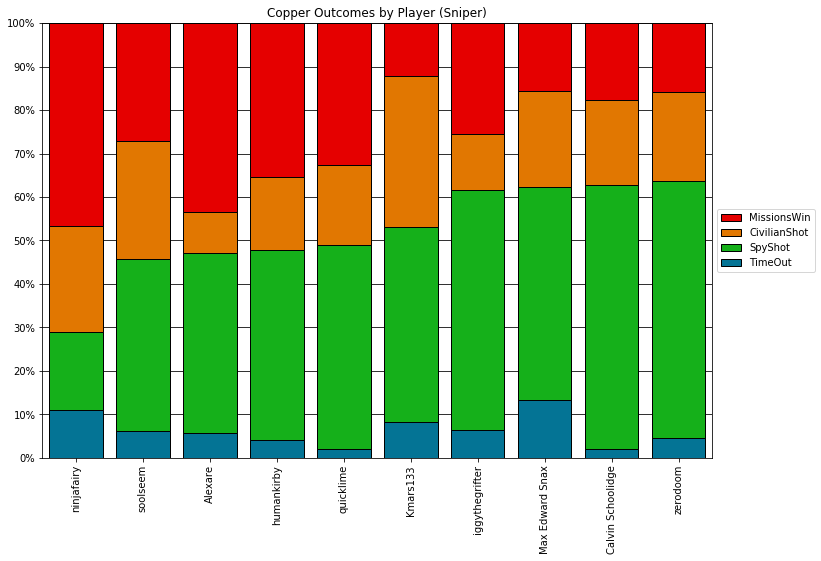

DataPlotProperties(frame=                      ninjafairy  soolseem   Alexare  humankirby  quicklime  \
WinType.MissionsWin     0.466667  0.270833  0.433962    0.354167   0.326531   
WinType.CivilianShot    0.244444  0.270833  0.094340    0.166667   0.183673   
WinType.SpyShot         0.177778  0.395833  0.415094    0.437500   0.469388   
WinType.TimeOut         0.111111  0.062500  0.056604    0.041667   0.020408   

                      Kmars133  iggythegrifter  Max Edward Snax  \
WinType.MissionsWin   0.122449        0.255319         0.155556   
WinType.CivilianShot  0.346939        0.127660         0.222222   
WinType.SpyShot       0.448980        0.553191         0.488889   
WinType.TimeOut       0.081633        0.063830         0.133333   

                      Calvin Schoolidge  zerodoom  
WinType.MissionsWin            0.176471  0.159091  
WinType.CivilianShot           0.196078  0.204545  
WinType.SpyShot                0.607843  0.590909  
WinType.TimeOut                0.01

In [9]:
game_outcomes(
    div_replays,
    DataQueryProperties(
        groupby=lambda g: g.sniper,
        percent_normalized_data=True,
        primary_order=[WinType.MissionsWin, WinType.CivilianShot, WinType.SpyShot, WinType.TimeOut],
        secondary_order=sort_by_spy_wins,
        reverse_secondary_order=True
    ),
    AxisProperties(title=f"{division} Outcomes by Player (Sniper)")
)

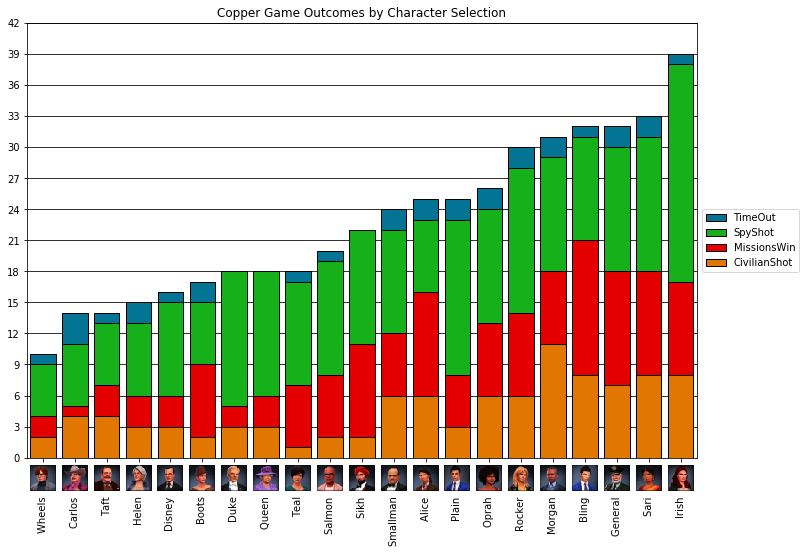

DataPlotProperties(frame=                      Wheels  Carlos  Taft  Helen  Disney  Boots  Duke  Queen  \
WinType.TimeOut            1       3     1      2       1      2     0      0   
WinType.SpyShot            5       6     6      7       9      6    13     12   
WinType.MissionsWin        2       1     3      3       3      7     2      3   
WinType.CivilianShot       2       4     4      3       3      2     3      3   

                      Teal  Salmon  ...  Smallman  Alice  Plain  Oprah  \
WinType.TimeOut          1       1  ...         2      2      2      2   
WinType.SpyShot         10      11  ...        10      7     15     11   
WinType.MissionsWin      6       6  ...         6     10      5      7   
WinType.CivilianShot     1       2  ...         6      6      3      6   

                      Rocker  Morgan  Bling  General  Sari  Irish  
WinType.TimeOut            2       2      1        2     2      1  
WinType.SpyShot           14      11     10       12    13    

In [10]:
game_outcomes(
    div_replays,
    DataQueryProperties(
        groupby=lambda g: determine_character_in_role(g, Roles.Spy),
        secondary_order=sum,
    ),
    AxisProperties(title=f"{division} Game Outcomes by Character Selection", x_axis_portrait=True)
)

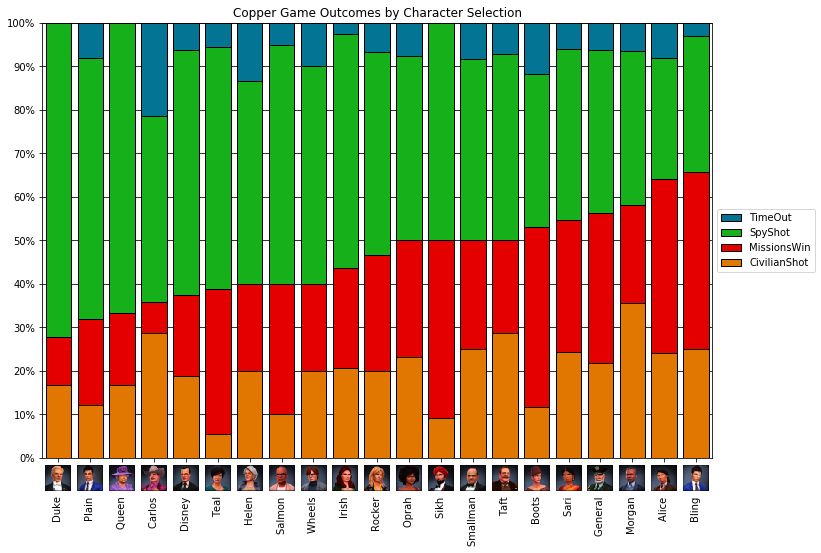

DataPlotProperties(frame=                          Duke  Plain     Queen    Carlos  Disney      Teal  \
WinType.TimeOut       0.000000   0.08  0.000000  0.214286  0.0625  0.055556   
WinType.SpyShot       0.722222   0.60  0.666667  0.428571  0.5625  0.555556   
WinType.MissionsWin   0.111111   0.20  0.166667  0.071429  0.1875  0.333333   
WinType.CivilianShot  0.166667   0.12  0.166667  0.285714  0.1875  0.055556   

                         Helen  Salmon  Wheels     Irish  ...     Oprah  \
WinType.TimeOut       0.133333    0.05     0.1  0.025641  ...  0.076923   
WinType.SpyShot       0.466667    0.55     0.5  0.538462  ...  0.423077   
WinType.MissionsWin   0.200000    0.30     0.2  0.230769  ...  0.269231   
WinType.CivilianShot  0.200000    0.10     0.2  0.205128  ...  0.230769   

                          Sikh  Smallman      Taft     Boots      Sari  \
WinType.TimeOut       0.000000  0.083333  0.071429  0.117647  0.060606   
WinType.SpyShot       0.500000  0.416667  0.428571  0.3

In [11]:
game_outcomes(
    div_replays,
    DataQueryProperties(
        groupby=lambda g: determine_character_in_role(g, Roles.Spy),
        secondary_order=sort_by_spy_wins,
        percent_normalized_data=True,
    ),
    AxisProperties(title=f"{division} Game Outcomes by Character Selection", x_axis_portrait=True)
)

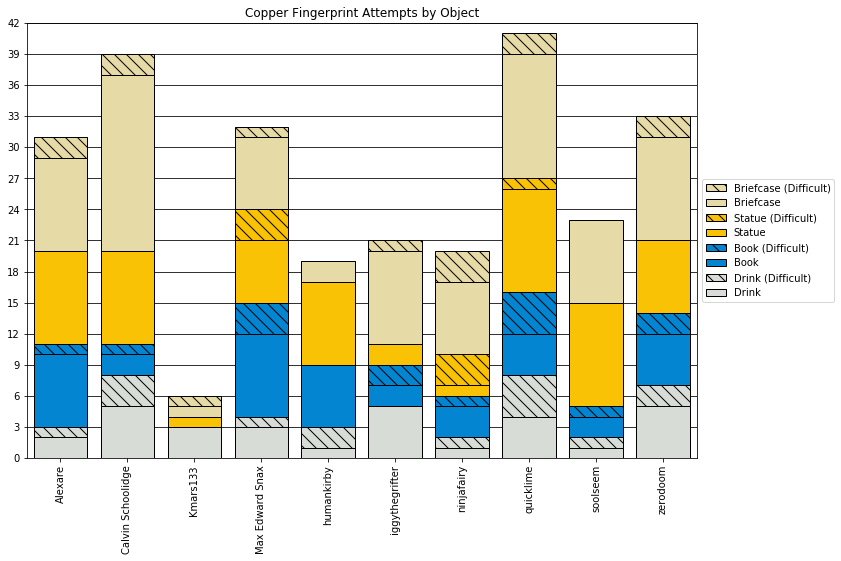

DataPlotProperties(frame=                                     Alexare  Calvin Schoolidge  Kmars133  \
(TimelineCategory.Briefcase, True)         2                  2         1   
(TimelineCategory.Briefcase, False)        9                 17         1   
(TimelineCategory.Statues, True)           0                  0         0   
(TimelineCategory.Statues, False)          9                  9         1   
(TimelineCategory.Books, True)             1                  1         0   
(TimelineCategory.Books, False)            7                  2         0   
(TimelineCategory.Drinks, True)            1                  3         0   
(TimelineCategory.Drinks, False)           2                  5         3   

                                     Max Edward Snax  humankirby  \
(TimelineCategory.Briefcase, True)                 1           0   
(TimelineCategory.Briefcase, False)                7           2   
(TimelineCategory.Statues, True)                   3           0   
(Timeline

In [12]:
attempted_fingerprint_sources(
    div_replays,
    DataQueryProperties(
        groupby=lambda g: g.spy,
    ),
    AxisProperties(title=f"{division} Fingerprint Attempts by Object")
)

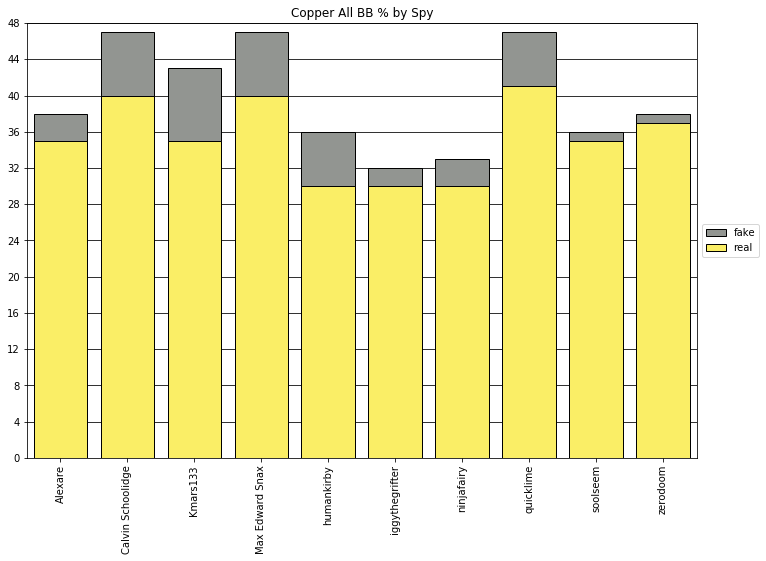

DataPlotProperties(frame=      Alexare  Calvin Schoolidge  Kmars133  Max Edward Snax  humankirby  \
fake        3                  7         8                7           6   
real       35                 40        35               40          30   

      iggythegrifter  ninjafairy  quicklime  soolseem  zerodoom  
fake               2           3          6         1         1  
real              30          30         41        35        37  , stacks_are_categories=False)

In [13]:
all_banana_bread_percentages(
    div_replays,
    DataQueryProperties(
        groupby=lambda g: g.spy,
    ),
    AxisProperties(title=f"{division} All BB % by Spy")
)

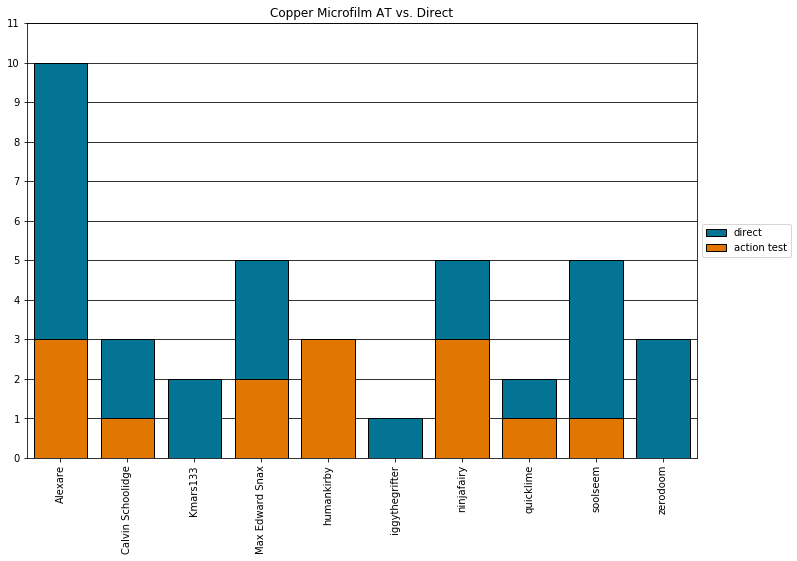

DataPlotProperties(frame=             Alexare  Calvin Schoolidge  Kmars133  Max Edward Snax  \
direct             7                  2         2                3   
action test        3                  1         0                2   

             humankirby  iggythegrifter  ninjafairy  quicklime  soolseem  \
direct                0               1           2          1         4   
action test           3               0           3          1         1   

             zerodoom  
direct              3  
action test         0  , stacks_are_categories=False)

In [14]:
at_or_direct_mf(
    div_replays,
    DataQueryProperties(
        groupby=lambda g: g.spy,
    ),
    AxisProperties(title=f"{division} Microfilm AT vs. Direct")
)

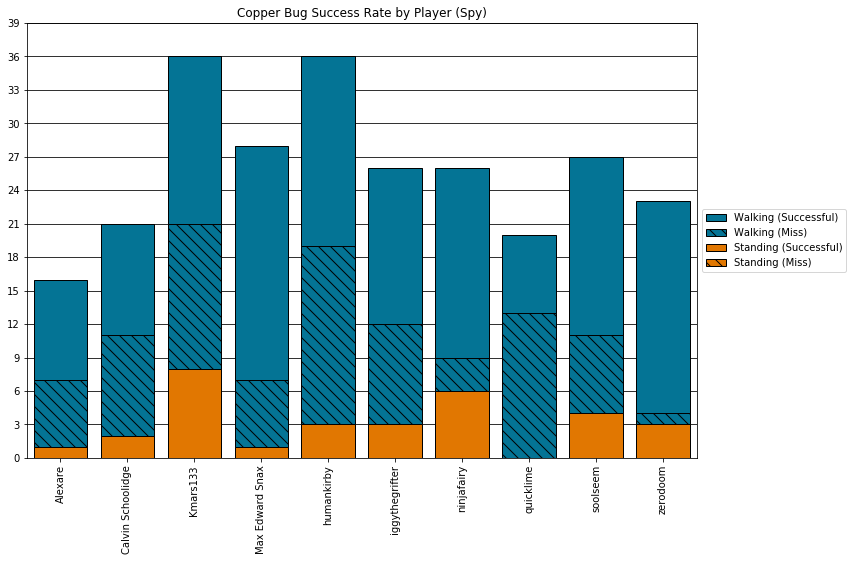

DataPlotProperties(frame=                   Alexare  Calvin Schoolidge  Kmars133  Max Edward Snax  \
(Walking, True)          9                 10        15               21   
(Walking, False)         6                  9        13                6   
(Standing, True)         1                  2         8                1   
(Standing, False)        0                  0         0                0   

                   humankirby  iggythegrifter  ninjafairy  quicklime  \
(Walking, True)            17              14          17          7   
(Walking, False)           16               9           3         13   
(Standing, True)            3               3           6          0   
(Standing, False)           0               0           0          0   

                   soolseem  zerodoom  
(Walking, True)          16        19  
(Walking, False)          7         1  
(Standing, True)          4         3  
(Standing, False)         0         0  , stacks_are_categories=False)

In [15]:
bug_success_rate(
    div_replays,
    DataQueryProperties(
        groupby=lambda g: g.spy,
    ),
    AxisProperties(title=f"{division} Bug Success Rate by Player (Spy)")
)

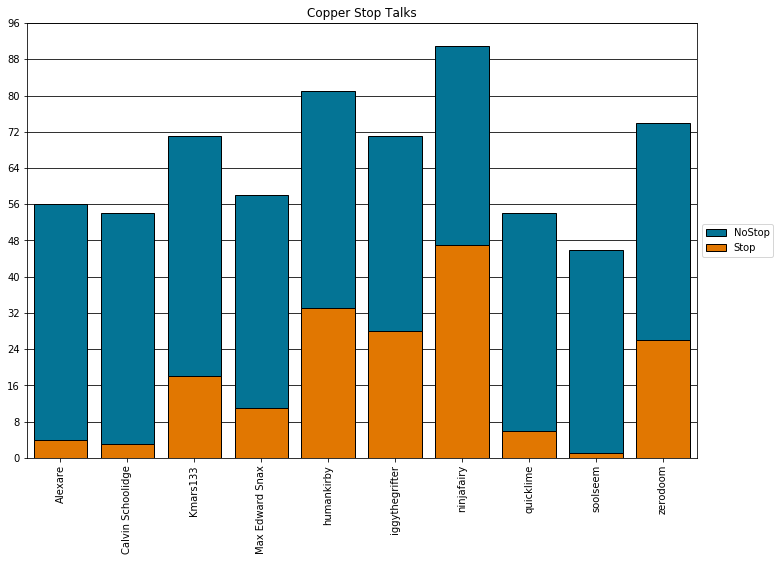

DataPlotProperties(frame=        Alexare  Calvin Schoolidge  Kmars133  Max Edward Snax  humankirby  \
NoStop       52                 51        53               47          48   
Stop          4                  3        18               11          33   

        iggythegrifter  ninjafairy  quicklime  soolseem  zerodoom  
NoStop              43          44         48        45        48  
Stop                28          47          6         1        26  , stacks_are_categories=False)

In [16]:
stop_talk_in_game_percentage(
    div_replays,
    DataQueryProperties(
        groupby=lambda g: g.spy,
    ),
    AxisProperties(title=f"{division} Stop Talks")
)

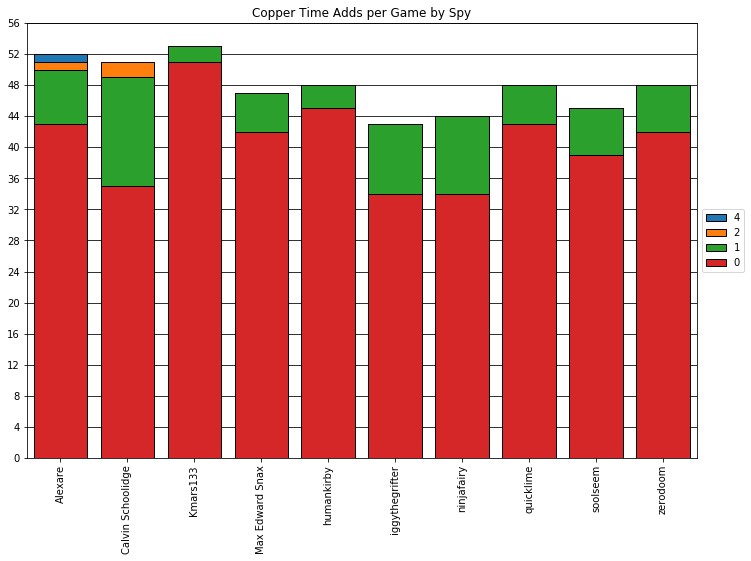

DataPlotProperties(frame=   Alexare  Calvin Schoolidge  Kmars133  Max Edward Snax  humankirby  \
4        1                  0         0                0           0   
2        1                  2         0                0           0   
1        7                 14         2                5           3   
0       43                 35        51               42          45   

   iggythegrifter  ninjafairy  quicklime  soolseem  zerodoom  
4               0           0          0         0         0  
2               0           0          0         0         0  
1               9          10          5         6         6  
0              34          34         43        39        42  , stacks_are_categories=False)

In [17]:
time_add_times_per_game(
    div_replays,
    DataQueryProperties(
        groupby=lambda g: g.spy,
    ),
    AxisProperties(title=f"{division} Time Adds per Game by Spy")
)